In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
df=pd.read_csv('data.csv',encoding='unicode_escape')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329897 entries, 0 to 329896
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     217057 non-null  object 
 1   sampling_date                329897 non-null  object 
 2   state                        329897 non-null  object 
 3   location                     329897 non-null  object 
 4   agency                       213085 non-null  object 
 5   type                         325508 non-null  object 
 6   so2                          300593 non-null  float64
 7   no2                          316878 non-null  float64
 8   rspm                         297041 non-null  float64
 9   spm                          149139 non-null  float64
 10  location_monitoring_station  307786 non-null  object 
 11  pm2_5                        7866 non-null    float64
 12  date                         329893 non-null  object 
dtyp

In [5]:
df.isnull().sum()

stn_code                       112840
sampling_date                       0
state                               0
location                            0
agency                         116812
type                             4389
so2                             29304
no2                             13019
rspm                            32856
spm                            180758
location_monitoring_station     22111
pm2_5                          322031
date                                4
dtype: int64

In [6]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

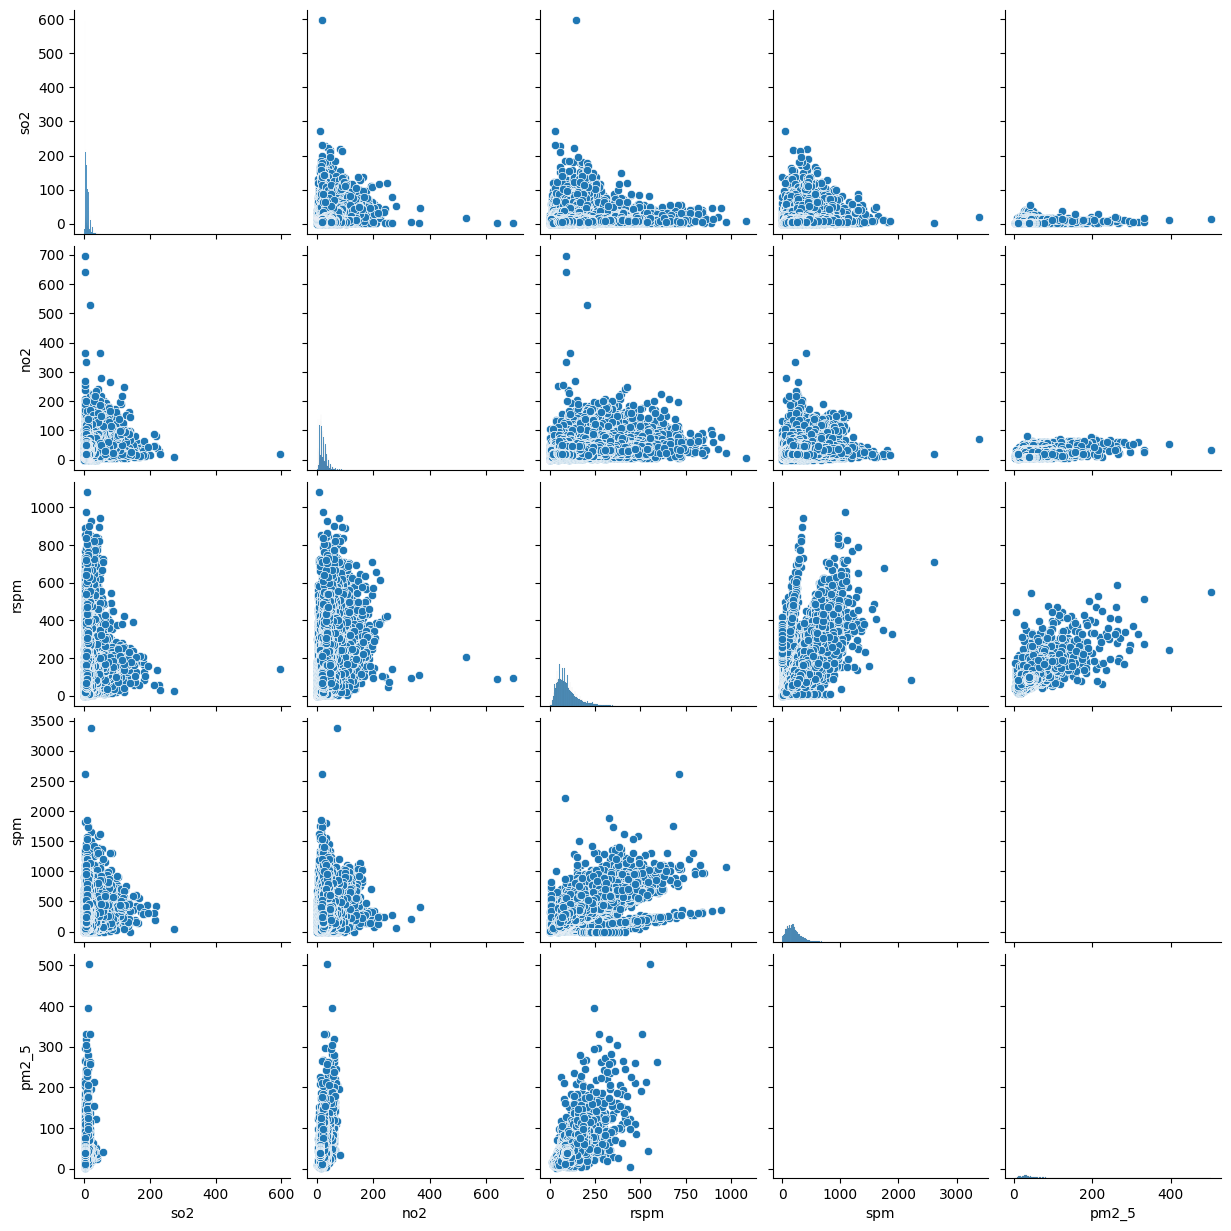

In [7]:
sns.pairplot(data=df)

In [8]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
nullvalues

pm2_5                          322031
spm                            180758
agency                         116812
stn_code                       112840
rspm                            32856
so2                             29304
location_monitoring_station     22111
no2                             13019
type                             4389
date                                4
sampling_date                       0
state                               0
location                            0
dtype: int64

In [9]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [10]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])

In [11]:
missing_data_with_percentage

,Total,Percent
pm2_5,322031,97.615619
spm,180758,54.792253
agency,116812,35.408628
stn_code,112840,34.204615
rspm,32856,9.959472
so2,29304,8.882773
location_monitoring_station,22111,6.702395
no2,13019,3.946383
type,4389,1.330415
date,4,0.001212


In [12]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [13]:
df.isnull().sum()

state            0
location         0
type          4389
so2          29304
no2          13019
rspm         32856
spm         180758
pm2_5       322031
dtype: int64

In [14]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
df.fillna(0, inplace=True)

In [15]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [16]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()
# calculating the individual pollutant index for so2(sulphur dioxide)

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [17]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [18]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()
# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [23]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi

df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()
# calculating the individual pollutant index for spm(suspended particulate matter)

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [20]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()
# Caluclating the Air Quality Index.

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [21]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [24]:
df['AQI_Range'].value_counts()

AQI_Range
Good              172649
Poor               76331
Moderate           40443
Unhealthy          23046
Very unhealthy      9106
Hazardous           8322
Name: count, dtype: int64

In [25]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [26]:
Y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(263917, 4) (65980, 4) (263917,) (65980,)


In [28]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [29]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [30]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.48100608351261614
RMSE TestData =  1.1058383379762398
--------------------------------------------------
RSquared value on train: 0.9999766642255743
RSquared value on test: 0.9998763674047979


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
X2 = df[['SOi','Noi','Rpi','SPMi']]
Y2 = df['AQI_Range']

In [33]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)

In [34]:
#fit the model on train data
RF=RandomForestClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  0.9999954757272769
Model accuracy on test is:  0.9998438461609119
--------------------------------------------------
KappaScore is:  0.9997604732991977
